In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import librosa

#Access to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The file path for google drive
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/Harry_star/*.wav' 
files = glob.glob(sample_path)
len(files) #Number files in dataset

826

**Preprocessing step:**

In [ ]:
#new array which save the file_name, participant_ID, interpretation_type, interpretation_number and song from files
Potter_Star = [] 


for file in files:
  file_name = file.split('/')[-1] #Extract the file name
  participant_ID = file.split('/')[-1].split('_')[0] #extract the participant ID from file name
  interpretation_type = file.split('/')[-1].split('_')[1] #extract the interpretation type from file name
  #print(file) # useful know which file gives an error 
  interpretation_number = file.split('/')[-1].split('_')[2] #extract the interpretation number from file name
  #print(file) # useful know which file gives an error 
  song = file.split('/')[-1].split('_')[3].split('.')[0] #extract the song name from file name

  if song == '[StarWars]': #remove the [] from song 
    song = song.replace('[','').replace(']','')
  if song == 'StarWars ': #remove the space from song 
    song = song.replace(' ','')
  
  if song == 'Potter ': #remove the space from song name
    song = song.replace(' ','')
  if song == '[Potter]': #remove the [] from song 
    song = song.replace('[','').replace(']','')
  
  Potter_Star.append([file_name,participant_ID,interpretation_type,interpretation_number, song]) #add the file to array

Potter_Star #display the array

[['S198_whistle_2_StarWars.wav', 'S198', 'whistle', '2', 'StarWars'],
 ['S122_hum_2_StarWars.wav', 'S122', 'hum', '2', 'StarWars'],
 ['S122_whistle_2_StarWars.wav', 'S122', 'whistle', '2', 'StarWars'],
 ['S190_whistle_2_StarWars.wav', 'S190', 'whistle', '2', 'StarWars'],
 ['S198_hum_2_StarWars.wav', 'S198', 'hum', '2', 'StarWars'],
 ['S190_hum_2_StarWars.wav', 'S190', 'hum', '2', 'StarWars'],
 ['S196_hum_4_StarWars.wav', 'S196', 'hum', '4', 'StarWars'],
 ['S100_hum_4_StarWars.wav', 'S100', 'hum', '4', 'StarWars'],
 ['S131_whistle_2_StarWars.wav', 'S131', 'whistle', '2', 'StarWars'],
 ['S201_hum_4_StarWars.wav', 'S201', 'hum', '4', 'StarWars'],
 ['S200_hum_2_StarWars.wav', 'S200', 'hum', '2', 'StarWars'],
 ['S131_hum_2_StarWars.wav', 'S131', 'hum', '2', 'StarWars'],
 ['S100_hum_3_StarWars.wav', 'S100', 'hum', '3', 'StarWars'],
 ['S196_hum_3_StarWars.wav', 'S196', 'hum', '3', 'StarWars'],
 ['S200_whistle_2_StarWars.wav', 'S200', 'whistle', '2', 'StarWars'],
 ['S201_hum_3_StarWars.wav', '

In [ ]:
# Transfer the Potter_Star array to DataFrame
Potter_Star_df = pd.DataFrame(Potter_Star,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
Potter_Star_df

,participant,interpretation,number,song
file_id,,,,
S198_whistle_2_StarWars.wav,S198,whistle,2,StarWars
S122_hum_2_StarWars.wav,S122,hum,2,StarWars
S122_whistle_2_StarWars.wav,S122,whistle,2,StarWars
S190_whistle_2_StarWars.wav,S190,whistle,2,StarWars
S198_hum_2_StarWars.wav,S198,hum,2,StarWars
...,...,...,...,...
S141_hum_2_StarWar.wav,S141,hum,2,StarWar
S152_hum_4_Starwars.wav,S152,hum,4,Starwars
S159_whistle_2_Starwars.wav,S159,whistle,2,Starwars


In [ ]:
#Check values in interpretation column, which just needs the whistle and hum (small letter).
from collections import Counter
Counter(Potter_Star_df['interpretation'])

Counter({'Hum': 20,
         'Whistle': 8,
         'hum': 570,
         'whisle': 2,
         'whislte': 1,
         'whistle': 225})

In [ ]:
#Change the wrong spelling or capital letter to whistle or hum.
for i in range(len(Potter_Star_df)):
  if Potter_Star_df['interpretation'][i]=='Hum':
    Potter_Star_df['interpretation'][i]='hum'
  if (Potter_Star_df['interpretation'][i]=='Whistle') or (Potter_Star_df['interpretation'][i]=='whisle') or (Potter_Star_df['interpretation'][i]=='whislte'):
    Potter_Star_df['interpretation'][i]='whistle'

Counter(Potter_Star_df['interpretation']) #Make sure about the value 

Counter({'hum': 590, 'whistle': 236})

Counter({'hum': 590, 'whistle': 236})


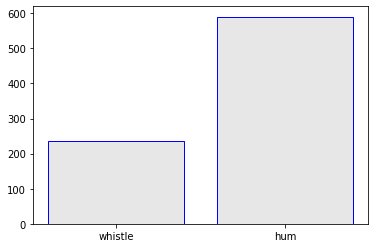

In [ ]:
#display by bar plot the whistle and hum values in dataset
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# summarize the number of songs in each class
counter=Counter(Potter_Star_df['interpretation'])

print(counter)

# plot the distribution
pyplot.bar(counter.keys(), counter.values(), color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pyplot.show()

In [ ]:
#Check values in song column, which just needs the Potter and StarWars (upper case).
from collections import Counter 
Counter(Potter_Star_df['song'])

Counter({'Potter': 411,
         'StarWar': 2,
         'StarWars': 407,
         'Starwars': 3,
         'imperial': 1,
         'potter': 2})

In [ ]:
#Change the wrong spelling or small letter to Potter or StarWars.
for i in range(len(Potter_Star_df)):
  if Potter_Star_df['song'][i]=='potter':
    Potter_Star_df['song'][i]='Potter'
  if (Potter_Star_df['song'][i]=='StarWar') or (Potter_Star_df['song'][i]=='Starwars') or (Potter_Star_df['song'][i]=='imperial'):
    Potter_Star_df['song'][i]='StarWars'

Counter(Potter_Star_df['song'])

Counter({'Potter': 413, 'StarWars': 413})

Counter({'StarWars': 413, 'Potter': 413})


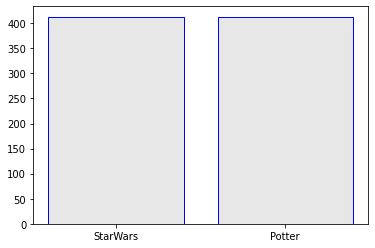

In [ ]:
#display by bar plot the StarWars and Potter values in dataset
from matplotlib import pyplot
# summarize the number of songs in each class
counter = Counter(Potter_Star_df['song'])
print(counter)

# plot the distribution
pyplot.bar(counter.keys(), counter.values(), color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pyplot.show()

**Features extraction:**


In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
#Features extraction in this function which used power, pitch_mean, and pitch_std, other features did not use because they decreased the accuracy
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    #fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[file_name]['song'] #y will be song name 

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    #spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=fs)
    #mfcc=librosa.feature.mfcc(y=x , sr=fs)   
    #roll=librosa.feature.spectral_rolloff(y=x, sr=fs)
    #zero_crossing=librosa.feature.zero_crossing_rate(x) 
    #rms=librosa.feature.rms(y=x)
    #--------------
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    #voiced_fr = np.mean(voiced_flag)
    #pitch_mfcc = np.nanmean(mfcc) if np.mean(np.isnan(mfcc))<1 else 0
    #pitch_roll = np.nanmean(roll) if np.mean(np.isnan(roll))<1 else 0 
    #pitch_zero_crossing = np.nanmean(zero_crossing) if np.mean(np.isnan(zero_crossing))<1 else 0
    #pitch_rms = np.nanmean(rms) if np.mean(np.isnan(rms))<1 else 0  
    #pitch_spec_bw = np.nanmean(spec_bw) if np.mean(np.isnan(spec_bw))<1 else 0

    xi = [power, pitch_mean,pitch_std] #add features' number in array
    X.append(xi) #add xi in X array
    y.append(yi) #add songs name in y array

  return np.array(X),np.array(y)

In [ ]:
#Recall the function which extracts the features 
X,y = getXy(files, labels_file=Potter_Star_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 826/826 [40:17<00:00,  2.93s/it]


In [ ]:
#Create a new dataframe which include the features with Potter_Star_df values
from pandas.core.frame import DataFrame
nweDF = Potter_Star_df
data_c = DataFrame(X) #add X values which output from getXy function
data_c.columns = ['power','pitch_mean','pitch_std']

#print(data_c)
power= data_c['power'].tolist()
pitch_mean= data_c['pitch_mean'].tolist()
pitch_std= data_c['pitch_std'].tolist()

nweDF['power']= power
nweDF['pitch_mean']= pitch_mean
nweDF['pitch_std']= pitch_std

#drop the other columns, except the features columns
nweDF=nweDF.drop(['participant','interpretation','song'], axis=1)

nweDF

,number,power,pitch_mean,pitch_std
file_id,,,,
S198_whistle_2_StarWars.wav,2,0.006383,432.361846,19.235395
S122_hum_2_StarWars.wav,2,0.030498,187.117973,24.220119
S122_whistle_2_StarWars.wav,2,0.054620,402.317414,28.792176
S190_whistle_2_StarWars.wav,2,0.012772,386.596488,25.830825
S198_hum_2_StarWars.wav,2,0.043647,224.377479,48.834737
...,...,...,...,...
S141_hum_2_StarWar.wav,2,0.028972,134.168242,33.745579
S152_hum_4_Starwars.wav,4,0.001342,127.485330,30.093204
S159_whistle_2_Starwars.wav,2,0.030556,385.987348,44.375888


In [ ]:
#save nweDF dataframe in CSV file which helps to save time 
nweDF2 = nweDF.to_csv('/content/drive/MyDrive/Data/MLEndHW/sample/Harry_star/preprocessing1.csv') #save it 
nweDF = nweDF2.read_csv('/content/drive/MyDrive/Data/MLEndHW/sample/Harry_star/preprocessing1.csv')
#y_new = y

In [ ]:
#Size of X and y
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)

The shape of X is (826, 3)
The shape of y is (826,)


**Modelling:**

In [ ]:
from sklearn.model_selection import train_test_split

#Split X and y into training and validation sets which represents 80% and 20% respectively
X_train, X_val, y_train, y_val = train_test_split(nweDF,y,test_size=0.2, random_state=43)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((660, 4), (166, 4), (660,), (166,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Using three classifications which will choose the best accuracy

#LogisticRegression Classifier pipeline
pipe_lr=Pipeline([('scalar',StandardScaler()),
                  ('lr_classifier',LogisticRegression())])
pipe_lr.fit(X_train, y_train) #fit the training set
print("The Training accuracy of Logistic Regression: {0:0.2f}".format(pipe_lr.score(X_train, y_train)))
print("The Validation accuracy of Logistic Regression: {0:0.2f} \n".format(pipe_lr.score(X_val, y_val)))
print("------------------------------")

#DecisionTree Classifier pipeline
pipel_dt=Pipeline([('scalar',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])
pipel_dt.fit(X_train, y_train) #fit the training set
print("The Training accuracy of Decision Tree: {0:0.2f}".format(pipel_dt.score(X_train, y_train)))
print("The Validation accuracy of Decision Tree: {0:0.2f} \n".format(pipel_dt.score(X_val, y_val)))
print("------------------------------")

#SVC Classifier pipeline
pipelines_SVC= Pipeline([('scalar', StandardScaler()),
                      ('svc_classifier', SVC())])
pipelines_SVC.fit(X_train, y_train) #fit the training set
print("The Training accuracy of SVC: {0:0.2f}".format(pipelines_SVC.score(X_train, y_train)))
print("The Validation accuracy of SVC: {0:0.2f} \n".format(pipelines_SVC.score(X_val, y_val)))


The Training accuracy of Logistic Regression: 0.70
The Validation accuracy of Logistic Regression: 0.74 

------------------------------
The Training accuracy of Decision Tree: 1.00
The Validation accuracy of Decision Tree: 0.76 

------------------------------
The Training accuracy of SVC: 0.72
The Validation accuracy of SVC: 0.77 



In [ ]:
#Comparing with three classifications, Decision Tree Classifier is overfitting, Logistic Regression good accuracy but SVC is better 

#chosen SVM classifier, edit the parameters to improve the value, C=4 improve the results

pipelines_SVC= Pipeline([('scalar', StandardScaler()),                   
                        ('svc_classifier', SVC(C=4))])

pipelines_SVC.fit(X_train, y_train)   #fit the training set
yt_p = pipelines_SVC.predict(X_train) #predict the X_train
yv_p = pipelines_SVC.predict(X_val)   #predict the X_val

print("The Training accuracy of SVC: {0:0.2f}".format(pipelines_SVC.score(X_train, y_train)))
print("The Validation accuracy of SVC: {0:0.2f} \n".format(pipelines_SVC.score(X_val, y_val)))

The Training accuracy of SVC: 0.72
The Validation accuracy of SVC: 0.78 



In [ ]:
# trying using GridSearchCV which might improve the accuracy 

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("classifier", SVC())])
param_grid = [
    {'classifier__C': [ 0.1, 1, 10, 100, 1000], 
     'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1]} ]
grid = GridSearchCV(pipe, param_grid=param_grid, cv=4, n_jobs=2)
grid.fit(X_train, y_train) #fit the training set

#yt_p = grid.predict(X_train)
#yv_p = grid.predict(X_val)

print('The Training Accuracy {0:0.02f}'.format(grid.score(X_train, y_train)))
print('The Validation  Accuracy {0:0.02f}'.format(grid.score(X_val, y_val)))
print(grid.best_estimator_) #to know which parameters will give better result

#The accuracy is decreased, so GridSearchCV don't use it.

The Training Accuracy 0.74
The Validation  Accuracy 0.74
Pipeline(steps=[('classifier', SVC(C=1000, gamma=0.0001))])


**Results:**

In [ ]:
# Creating a new dataframe that includes the true label (y_val) and prediction (yv_p).
# Dataframe will display all files with model prediction.

x_val_results= X_val
x_val_results['label']= y_val
x_val_results['prediction']=yv_p
x_val_results=x_val_results.drop(['number','power','pitch_mean', 'pitch_std'], axis=1)
display(x_val_results) #by table display all files 

,label,prediction
file_id,,
S150_hum_1_StarWars.wav,StarWars,Potter
S203_whistle_2_Potter.wav,Potter,Potter
S91_hum_2_Potter.wav,Potter,Potter
S151_whistle_2_StarWars.wav,StarWars,StarWars
S8_hum_1_Potter.wav,Potter,Potter
...,...,...
S42_hum_2_Potter.wav,Potter,Potter
S201_hum_4_StarWars.wav,StarWars,StarWars
S72_hum_2_StarWars.wav,StarWars,Potter


In [ ]:
#Display the misclassify file with prediction result by table
misclassify = x_val_results[ x_val_results['label'] != x_val_results['prediction']]
display(misclassify)
print('The number of misclassified files:',len(misclassify))

,label,prediction
file_id,,
S150_hum_1_StarWars.wav,StarWars,Potter
S131_hum_2_StarWars.wav,StarWars,Potter
S38_hum_3_Potter.wav,Potter,StarWars
S49_hum_4_Potter.wav,Potter,StarWars
S54_whistle_2_StarWars.wav,StarWars,Potter
S93_whistle_2_StarWars.wav,StarWars,Potter
S209_whistle_2_StarWars.wav,StarWars,Potter
S150_whistle_2_Potter.wav,Potter,StarWars
S89_whistle_2_StarWars.wav,StarWars,Potter


The number of misclassified files: 36


In [ ]:
#display the results by classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, yv_p))

              precision    recall  f1-score   support

      Potter       0.76      0.88      0.82        92
    StarWars       0.82      0.66      0.73        74

    accuracy                           0.78       166
   macro avg       0.79      0.77      0.77       166
weighted avg       0.79      0.78      0.78       166



In [ ]:
# confusion matrix heatmap function to display confusion matrix heatmap when recalling the function
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_val, yv_p):
    """Function to plot a confusion matrix"""
    labels = list(set(y_val))   # get the labels in the y_val
    #print(labels)
    cm = confusion_matrix(y_val, yv_p)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    #disply the classes name 
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=0)
    ax.set_yticklabels( labels)
    #count counts the values match
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")
    plt.xlabel('Predicted')
    plt.ylabel('Label')
   
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.1
    t -= 0.1 
    plt.ylim(b, t)
    plt.show() 

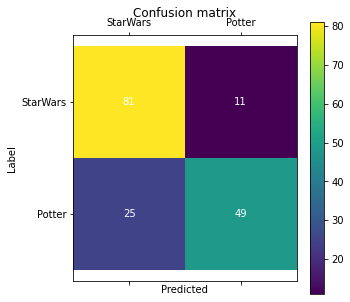

In [ ]:
#display the heatmap
confusion_matrix_heatmap(y_val, yv_p)